In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
chest_xray
app.py
static
AIDS.keras
Dataset found!
['chest_xray', 'app.py', 'static', 'AIDS.keras']
(5222, 128, 128) (5222,)
(624, 128, 128) (624,)
(16, 128, 128) (16,)


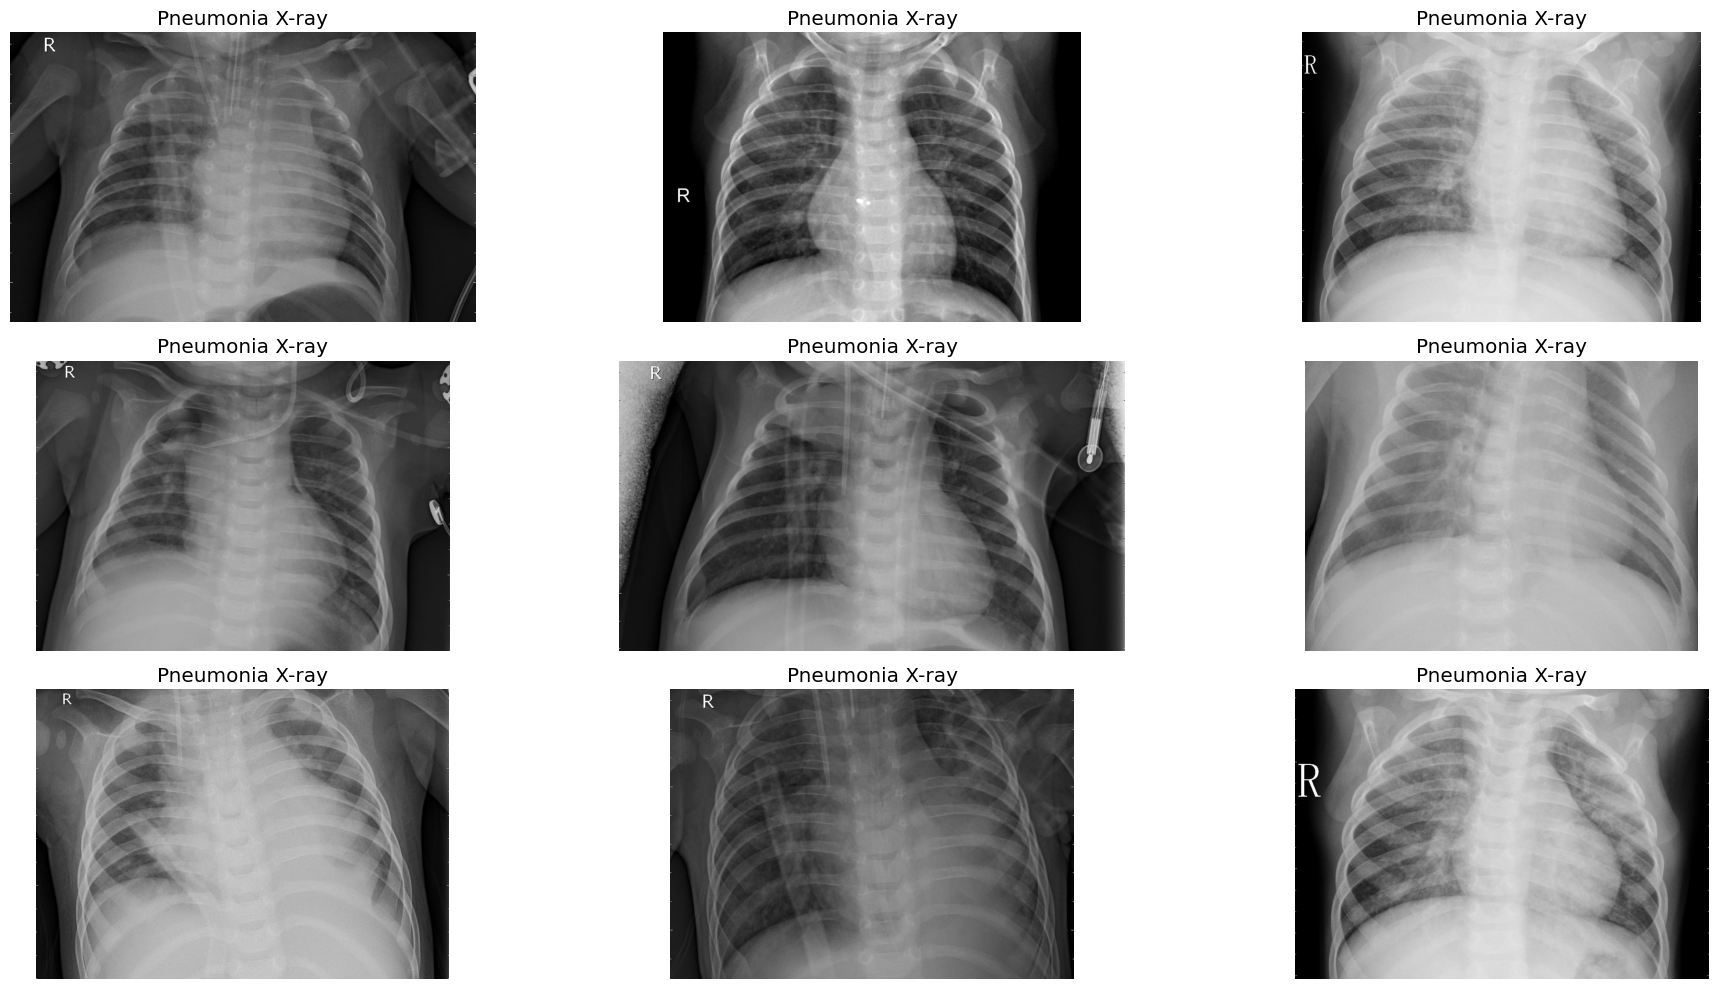

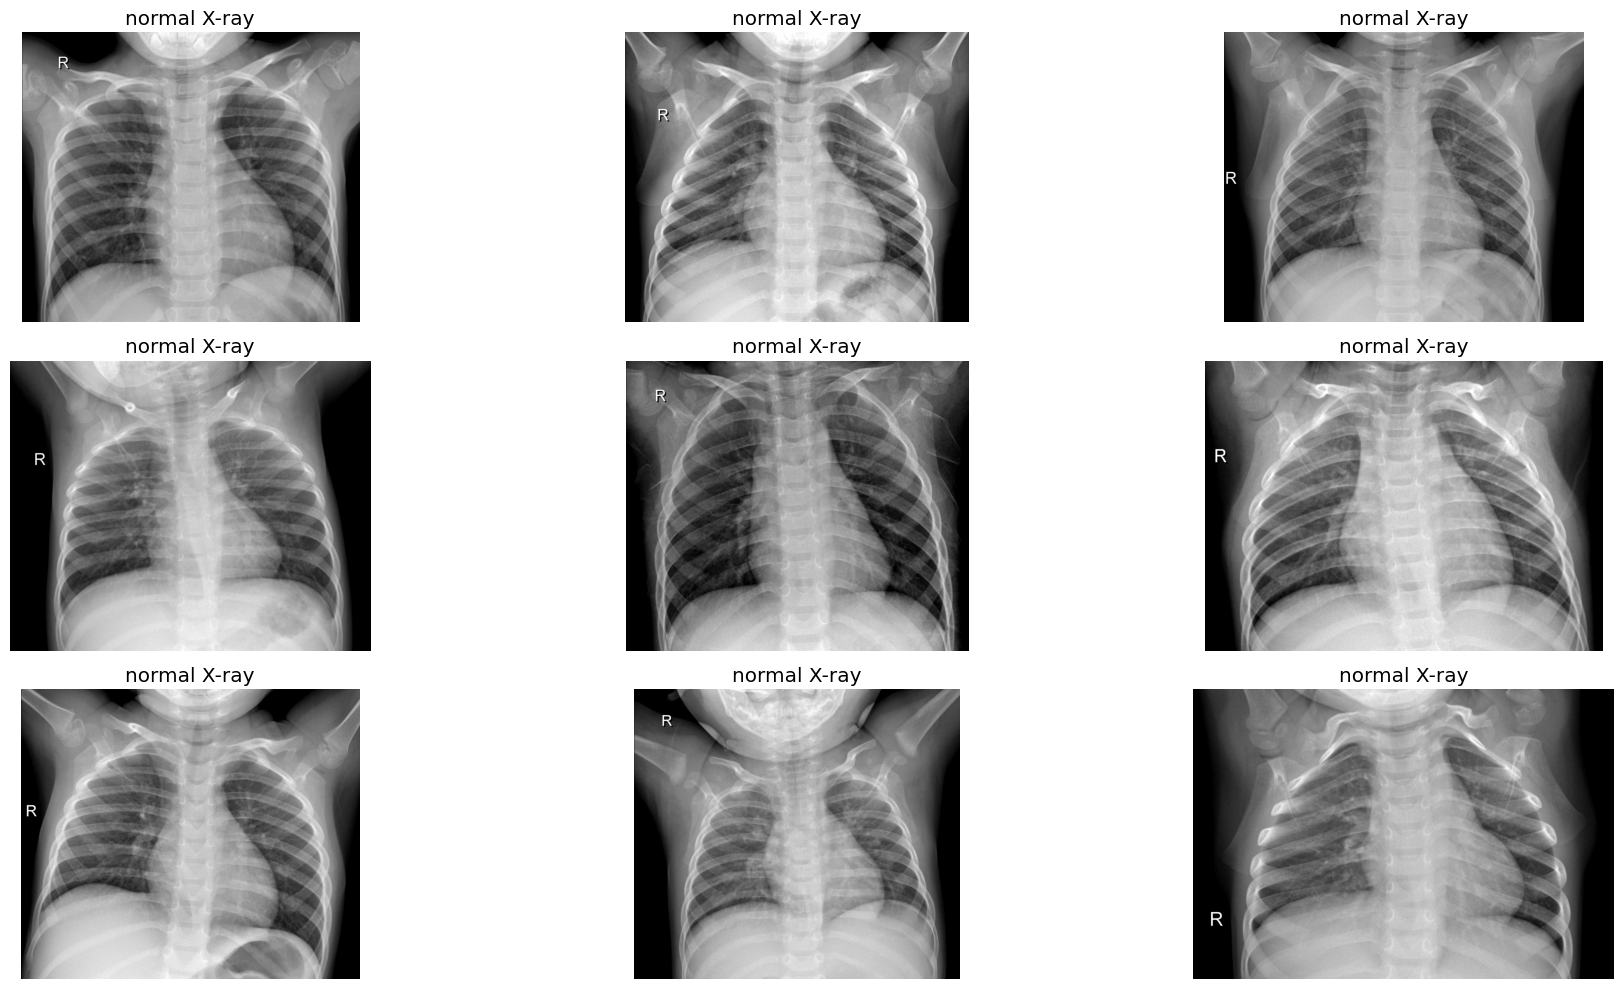

<ipython-input-2-c302833c9d30>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=listx, palette="Set2")


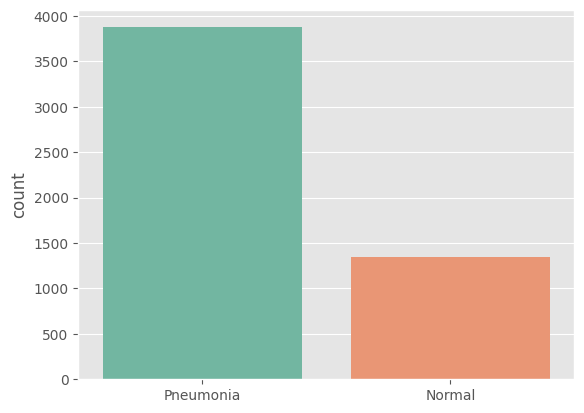

Found 5222 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten,Dropout
from tensorflow.keras.applications.vgg19 import VGG19

%run "/content/drive/My Drive/Colab Notebooks/DataPreprocessing.ipynb"

In [ ]:
base_model = VGG19(input_shape = (128,128,3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

flat = Flatten()(base_model.output)
class_1 = Dense(4608, activation = 'relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(dropout)
output = Dense(2, activation = 'softmax')(class_2)

model_vggnet = Model(base_model.inputs, output)
model_vggnet.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │    37,753,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 43,065,218 (164.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
adam = keras.optimizers.Adam(learning_rate=10**-3)
model_vggnet.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

In [ ]:
history1 = model_vggnet.fit(train_generator,
            steps_per_epoch=50,
            epochs=15,
            validation_data=valid_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 644ms/step - accuracy: 0.6654 - loss: 3.8281 - val_accuracy: 0.8125 - val_loss: 0.4675
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 510ms/step - accuracy: 0.8297 - loss: 0.3818 - val_accuracy: 0.6875 - val_loss: 0.6278
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 529ms/step - accuracy: 0.8363 - loss: 0.3451 - val_accuracy: 0.6875 - val_loss: 0.7498
Epoch 4/15
14/50 ━━━━━━━━━━━━━━━━━━━━ 20s 556ms/step - accuracy: 0.8800 - loss: 0.2588

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.8635 - loss: 0.2981 - val_accuracy: 0.6875 - val_loss: 0.7609
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 533ms/step - accuracy: 0.8753 - loss: 0.2693 - val_accuracy: 0.7500 - val_loss: 0.5854
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 531ms/step - accuracy: 0.8631 - loss: 0.2990 - val_accuracy: 0.6875 - val_loss: 1.0048
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 507ms/step - accuracy: 0.8651 - loss: 0.2875 - val_accuracy: 0.8125 - val_loss: 0.3672
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.8023 - loss: 0.3932 - val_accuracy: 0.7500 - val_loss: 0.5540
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 515ms/step - accuracy: 0.8821 - loss: 0.2733 - val_accuracy: 0.7500 - val_loss: 0.8250
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 510ms/step - accuracy: 0.9073 - loss: 0.2200 - val_accuracy: 0.7500 - val_loss: 0.5851
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 509ms/step - accuracy: 0.8764 - loss: 0.2675 - val_accuracy: 0.750

In [ ]:
for layer in model_vggnet.layers:
  layer.trainable = True

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/vggnet_model.keras',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                             )

adam = keras.optimizers.Adam(learning_rate=10**-4)
model_vggnet.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

In [ ]:
history2 = model_vggnet.fit(train_generator,
            steps_per_epoch=50,
            epochs=15,
            callbacks=[checkpoint],
            validation_data=valid_generator)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.7471 - loss: 0.7733
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/vggnet_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 669ms/step - accuracy: 0.7469 - loss: 0.7709 - val_accuracy: 0.5000 - val_loss: 0.7412
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.7545 - loss: 0.5040
Epoch 2: val_accuracy did not improve from 0.50000
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 534ms/step - accuracy: 0.7541 - loss: 0.5048 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.7514 - loss: 0.5242
Epoch 3: val_accuracy improved from 0.50000 to 0.62500, saving model to /content/vggnet_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 815ms/step - accuracy: 0.7519 - loss: 0.5230 - val_accuracy: 0.6250 - val_loss: 0.6513
Epoch 4/15
14/50 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step - accuracy: 0.8343 - loss: 0.3377
Epoch 4: val_accuracy improved from 0.62500 to 0.7500

In [ ]:
vggnet_val_eval = model_vggnet.evaluate(valid_generator)
vggnet_test_eval = model_vggnet.evaluate(test_generator)
print(f"Validation Loss: {vggnet_val_eval[0]}")
print(f"Validation Accuracy: {vggnet_val_eval[1]}")
print(f"Test Loss: {vggnet_test_eval[0]}")
print(f"Test Accuracy: {vggnet_test_eval[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8125 - loss: 0.9631
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.8405 - loss: 0.4754
Validation Loss: 0.9630675911903381
Validation Accuracy: 0.8125
Test Loss: 0.4287565052509308
Test Accuracy: 0.8605769276618958


In [ ]:
best_model = tensorflow.keras.models.load_model('/content/vggnet_model.keras')
vggnet_val_eval2 = model_vggnet.evaluate(valid_generator)
vggnet_test_eval2 = model_vggnet.evaluate(test_generator)
print(f"Validation Loss: {vggnet_val_eval2[0]}")
print(f"Validation Accuracy: {vggnet_val_eval2[1]}")
print(f"Test Loss: {vggnet_test_eval2[0]}")
print(f"Test Accuracy: {vggnet_test_eval2[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8125 - loss: 0.9631
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - accuracy: 0.8593 - loss: 0.4268
Validation Loss: 0.9630675911903381
Validation Accuracy: 0.8125
Test Loss: 0.42875662446022034
Test Accuracy: 0.8605769276618958
